# WSI LAB02 - Filip Ryniewicz
Zaimplementowałem algorytm ewolucyjny oraz przetestowałem jego działania do znalezienia optymalnego przebiegu lądowania rakiety. Zbadałem wpływ prawdopodobieństwa mutacji na działanie algorytmu.

## Przykład działania algorytmu

In [1]:
from solver import MySolver
from costFunction import simulateLanding 

s = MySolver(200, 100, 0.1, 0.1, 1000)
output = s.solve(simulateLanding)
print(f'Najlepszy znaleziony osobnik uzyskał wynik: {output[1]}')
print(f'Ten osobnik to: {output[0]}')

Najlepszy znaleziony osobnik uzyskał wynik: 1921
Ten osobnik to: 00100101001000110000001110111000001110010001000101111000100010001000011110000111110101110101001010111010011100010111011110001101101010110000010000000010010100100001000010100010000000000100010101000100


## Badanie wpływu prawdopodobieństwa mutacji na działanie algorytmu

### Wykresy przedstawiające wynik uzyskany przez najlepszego osobnika w każdej iteracji
Przeprowadziłem eksperyment, w którym sprawdziłem, jak zmienia się najlepszy znaleziony osobnik w każdej kolejnej generacji w zależności od prawdopodobieństwa mutacji. Eksperyment ten pomoże zauważyć, czy prawdopodobieństwo mutacji wpływa na częstotliwość generacji, w których wszystkie osobniki mają ocenę ujemną. Również, pomoże zbadać czy z kolejnymi iteracji algorytm znajduje coraz lepsze rozwiązania. 

Parametry:
- 50 osobników w populacji
- prawdopodobieństwo krzyżowania: 0.1
- prawdopodobieństwa mutacji: opisane na wykresach
- ilość iteracji: 500

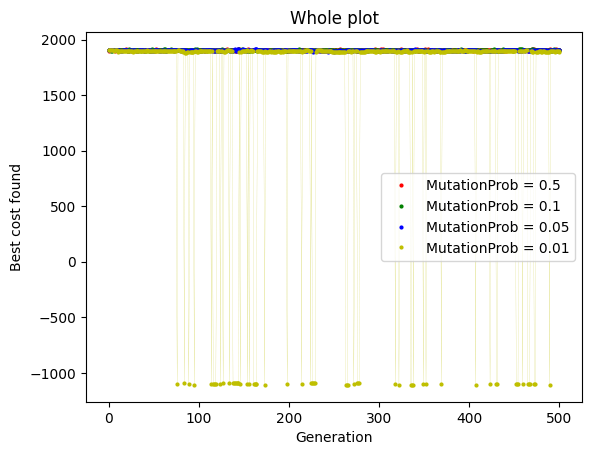

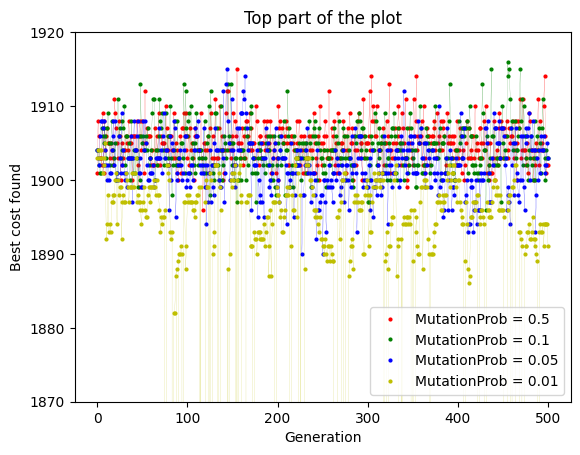

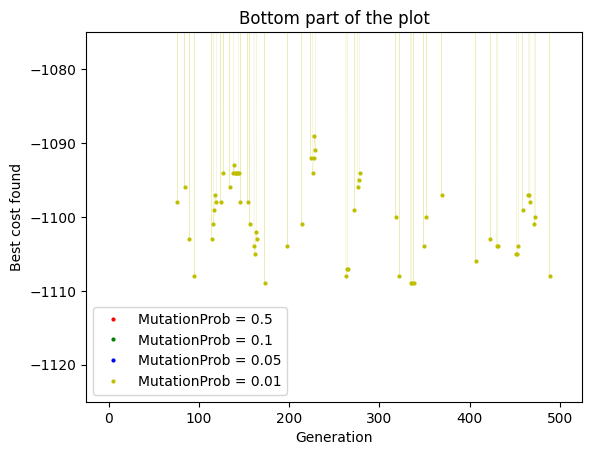

In [4]:
from plotting import plotMutationBest
plotMutationBest(200, 50, 500, [0.5, 0.1, 0.05, 0.01], 0.1, ['r', 'g', 'b', 'y'])

Wykres dla całego zbioru wartości jest mało czytelny, więc podzieliłem go na 2 wykresy - jeden z wartościami bliskimi do 1900 i drugi z bliskimi do -1100 \
Najlepsze wartości zostały znalezione dla prawdopodobieństw mutacji 0.5 i 0.1. Algorytm dla tych wartości w każdej iteracji znajdował osobniki o ocenie bliskiej do optimum (ponad 1900) i nie miał ani jednej iteracji w której najlepszy znaleziony osobnik miałby ocenę ujemną. 

Dla prawdopodobieństwa mutacji 0.01, algorytm miał wiele generacji, w których wszystkie osobniki miały ocenę ujemną. Ponadto, w generacjach z "dobrymi" osobnikami wartości wachały się w okolicy 1895 - dosyć dalego od prawdziwie wysokich wartości. Podobna sytuacja zachodziła dla mutacji 0.05. 

__Wniosek:__ \
Dla bardzo niskich prawdopodobieństw mutacji algorytm prawdopodobnie skupiał się na badaniu maksimów lokalnych, a przeskocznie do maksimum o wyższym szczycie wymagałoby wyższego prawdopodobieństwa mutacji.
Z drugiej strony, dla wyższych prawdopobieństw mutacji, algorytm znajdował lepsze maksima, aczkolwiek nie eksploitował ich do znalezienia najlepszego możliwego osobnika - szczytu maksimum.

### Wykres przedstawiający wynik medianowego osobnika w każdej iteracji
- 50 osobników w populacji
- prawdopodobieństwo krzyżowania: 0.1
- prawdopodobieństwa mutacji: opisane na wykresie
- ilość iteracji: 500

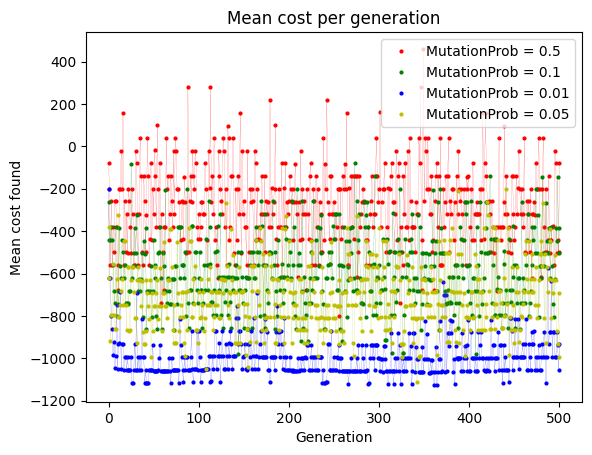

In [1]:
from plotting import plotMutationMean
plotMutationMean(200, 50, 500, [0.5, 0.1, 0.05, 0.01], 0.1, ['r', 'g', 'b', 'y'])

Wykres przedstawia medianę wartości osobników w każdej generacji i porównuje je pod względem prawdopodobieństwa mutacji.
Z wykresu wynika, że średni osobnik populacji o prawdopodobieństwie mutacji 0.5 miał najwyższą ocenę. Osobniki z populacji o prawdopodobieństwie 0.001 miały średnio najniższe oceny, a osobniki z pozostałych populacji wachały się mniej więcej po środku.

### Wynik działania algorytmu dla różnych prawdopodobieństw mutacji
- 50 osobników
- prawdopodobieństwo krzyżowania: 0.05
- 200 iteracji

In [2]:
from solver import MySolver
from costFunction import simulateLanding 
import numpy as np
for mutProb in [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
    scores = []
    for _ in range(25):
        s = MySolver(200, 50, mutProb, 0.05, 200)
        scores.append(s.solve(simulateLanding)[1])
    print(f'Dla mutationProb = {mutProb}, średni najlepszy wynik to: {np.average(scores)}. Odchylenie standardowe: {np.std(scores)}')

Dla mutationProb = 0.5, średni najlepszy wynik to: 1914.72. Odchylenie standardowe: 1.3422369388450015
Dla mutationProb = 0.1, średni najlepszy wynik to: 1914.36. Odchylenie standardowe: 1.5460918472070149
Dla mutationProb = 0.05, średni najlepszy wynik to: 1913.6. Odchylenie standardowe: 1.979898987322333
Dla mutationProb = 0.01, średni najlepszy wynik to: 1909.6. Odchylenie standardowe: 2.6076809620810595
Dla mutationProb = 0.005, średni najlepszy wynik to: 1908.0. Odchylenie standardowe: 1.7435595774162693
Dla mutationProb = 0.001, średni najlepszy wynik to: 1907.4. Odchylenie standardowe: 2.939387691339814


Dla wyższych prawdopodobieństw mutacji, algorytm konsekwentnie znajdował najlepsze rozwiązania, o czym świadczy niskie odchylenie standardowe. \
Dla najniższych prawdopodobieństw najlepsze osobniki miały dosyć niskie wyniki, a duże odchylenie standardowe świadczy o tym, że otrzymywane wyniki mocno się wachały.